# Exercício 7

Utilize o GeoPpandas para criar uma visualização geoespacial do mapa de Portugal, em que se pode visualizar a população de cada distrito por ano, usando o ficheiro dados_população.csv. 


Utilize também o seaborn para criar um gráfico a partir do mesmo ficheiro para criar uma linha temporal da evolução da população por distrito

In [1]:
from geodatasets import get_path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
from unidecode import unidecode
import geopandas as gpd
import folium
import branca.colormap as cm
from ipywidgets import interact, IntSlider

In [3]:
csv_distritos = gpd.read_file(r"../populacao_por_distrito_long.csv")
csv_distritos["Distrito"] = csv_distritos["Distrito"].astype(str).str.strip()
csv_distritos["Ano"] = csv_distritos["Ano"].astype(int)
csv_distritos["Populacao"] = pd.to_numeric(csv_distritos["Populacao"], errors="coerce")

csv_distritos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Distrito   294 non-null    object
 1   Ano        294 non-null    int64 
 2   Populacao  294 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.0+ KB


In [4]:
csv_distritos.isna().sum()

Distrito     0
Ano          0
Populacao    0
dtype: int64

In [7]:
!pwd
gdf_distritos = gpd.read_file(r"../distritos/distritos.shp")
gdf_distritos["NAME_1"] = gdf_distritos["NAME_1"].astype(str).str.strip()
gdf_distritos.info()

/Users/rosasampaio/Documents/curso pt/Python Visualization/projeto/test_final/entregue_english
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID_0       20 non-null     int64   
 1   ISO        20 non-null     object  
 2   NAME_0     20 non-null     object  
 3   ID_1       20 non-null     int64   
 4   NAME_1     20 non-null     object  
 5   HASC_1     20 non-null     object  
 6   CCN_1      20 non-null     int64   
 7   CCA_1      20 non-null     object  
 8   TYPE_1     20 non-null     object  
 9   ENGTYPE_1  20 non-null     object  
 10  NL_NAME_1  0 non-null      object  
 11  VARNAME_1  7 non-null      object  
 12  geometry   20 non-null     geometry
dtypes: geometry(1), int64(3), object(9)
memory usage: 2.2+ KB


In [8]:
gdf_merged = gdf_distritos.merge(
    csv_distritos,
    left_on="NAME_1",      
    right_on="Distrito",
    how="left"
)

gdf_merged.head(1)

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Distrito,Ano,Populacao
0,182,PRT,Portugal,1,Évora,PT.EV,0,07,Distrito,District,None,None,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466...",Évora,2024.0,153430.0


In [9]:
gdf_distritos.head(1)

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,182,PRT,Portugal,1,Évora,PT.EV,0,07,Distrito,District,None,None,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466..."


In [10]:
gdf_merged.isna().sum()

ID_0           0
ISO            0
NAME_0         0
ID_1           0
NAME_1         0
HASC_1         0
CCN_1          0
CCA_1          0
TYPE_1         0
ENGTYPE_1      0
NL_NAME_1    241
VARNAME_1    169
geometry       0
Distrito       3
Ano            3
Populacao      3
dtype: int64

In [11]:
gdf_merged[gdf_merged["Ano"].isna()]

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Distrito,Ano,Populacao
84,182,PRT,Portugal,7,Castelo Branco,PT.CB,0,05,Distrito,District,None,None,"POLYGON ((-7.29277 40.41613, -7.29026 40.41438...",NaN,NaN,NaN
225,182,PRT,Portugal,18,Viana do Castelo,PT.VC,0,16,Distrito,District,None,Vianna do Castello,"POLYGON ((-8.1912 42.14263, -8.19096 42.14261,...",NaN,NaN,NaN
226,182,PRT,Portugal,19,Vila Real,PT.VR,0,17,Distrito,District,None,Villa Real,"POLYGON ((-7.90587 41.92701, -7.90306 41.92643...",NaN,NaN,NaN


# Standardization due to differences in CSV and shapefiles

CSV → Castelo Branco

SHP → Castelo Branco

In [12]:
!pip install unidecode ipywidgets

In [13]:
def normalize(text):
    return unidecode(str(text)).replace(" ", "").lower()

csv_distritos["key"] = csv_distritos["Distrito"].apply(normalize)
gdf_distritos["key"] = gdf_distritos["NAME_1"].apply(normalize)

gdf_merged_2 = gdf_distritos.merge(
    csv_distritos,
    on="key",
    how="left"
)

In [14]:
gdf_merged_2.isna().sum()

ID_0           0
ISO            0
NAME_0         0
ID_1           0
NAME_1         0
HASC_1         0
CCN_1          0
CCA_1          0
TYPE_1         0
ENGTYPE_1      0
NL_NAME_1    280
VARNAME_1    182
geometry       0
key            0
Distrito       0
Ano            0
Populacao      0
dtype: int64

In [15]:
gdf_merged_2.loc[
    gdf_merged_2["Ano"].isna(),
    ["NAME_1", "Distrito", "Ano", "Populacao"]
]

,NAME_1,Distrito,Ano,Populacao


In [16]:
gdf_merged_2["Ano"].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014,
       2013, 2012, 2011])

In [19]:
gdf_base = (
    gdf_merged_2
    .drop_duplicates(subset=["NAME_1"])[["NAME_1", "geometry"]]
    .to_crs(4326)
    .copy()
)

anos = sorted(gdf_merged_2["Ano"].unique())

vmin = gdf_merged_2["Populacao"].min()
vmax = gdf_merged_2["Populacao"].max()
colormap = cm.LinearColormap(
    ["#fee5d9", "#fcae91", "#fb6a4a", "#de2d26", "#a50f15"],
    vmin=vmin, vmax=vmax
)

colormap.caption = "POPULATION"

In [20]:
def map_year(ano: int):
    df_year = gdf_merged_2.loc[gdf_merged_2["Ano"] == ano, ["NAME_1", "Populacao"]]
    gdf_base["geometry"] = gdf_base["geometry"].simplify(tolerance=0.01, preserve_topology=True)

    g = gdf_base.merge(df_year, on="NAME_1", how="left")

    m = folium.Map(location=[39.5, -8.0], zoom_start=6, tiles="cartodbpositron")

    def style_fn(feat):
        pop = feat["properties"].get("Populacao")
        return {
            "fillColor": colormap(pop) if pop is not None else "#cccccc",
            "color": "black",
            "weight": 0.6,
            "fillOpacity": 0.75
        }

    folium.GeoJson(
        g,
        style_function=style_fn,
        tooltip=folium.GeoJsonTooltip(
            fields=["NAME_1", "Populacao"],
            aliases=["Distrito:", "População:"],
            localize=True
        ),
        name=str(ano),
    ).add_to(m)

    colormap.add_to(m)
    folium.LayerControl(collapsed=True).add_to(m)

    return m

In [23]:
interact(
    map_year,
    ano=IntSlider(min=min(anos), max=max(anos), step=1, value=max(anos))
)

interactive(children=(IntSlider(value=2024, description='ano', max=2024, min=2011), Output()), _dom_classes=('…

<function __main__.map_year(ano: int)>

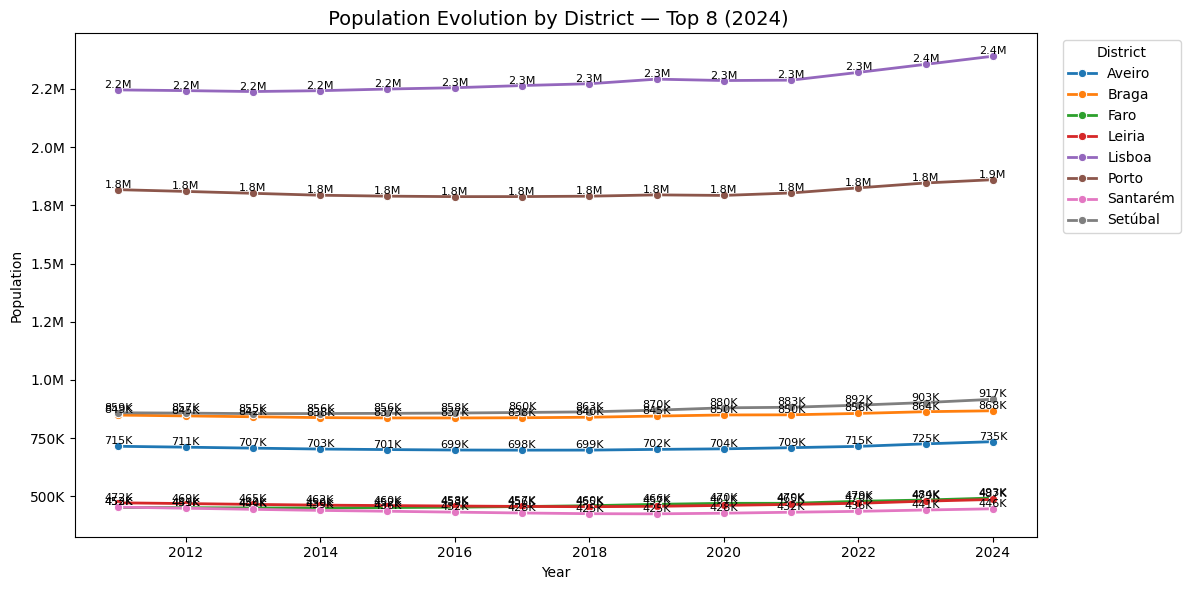

In [24]:
df_plot = gdf_merged_2[["NAME_1", "Ano", "Populacao"]].copy()

last_year = int(df_plot["Ano"].max())

TOP_N = 8
top_district = (
    df_plot[df_plot["Ano"] == last_year]
    .sort_values("Populacao", ascending=False)
    .head(TOP_N)["NAME_1"]
)

df_top = df_plot[df_plot["NAME_1"].isin(top_district)]

plt.figure(figsize=(12,6))

ax = sns.lineplot(
    data=df_top,
    x="Ano",
    y="Populacao",
    hue="NAME_1",
    marker="o",
    linewidth=2
)

for _, row in df_top.iterrows():
    if row["Populacao"] >= 1_000_000:
        label = f'{row["Populacao"]/1_000_000:.1f}M'
    elif row["Populacao"] >= 1_000:
        label = f'{row["Populacao"]/1_000:.0f}K'
    else:
        label = f'{row["Populacao"]:.0f}'

    ax.text(
        row["Ano"],
        row["Populacao"],
        label,
        fontsize=8,
        ha="center",
        va="bottom"
    )

ax.set_title(f" Population Evolution by District — Top {TOP_N} ({last_year})", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Population")

def format_k_m(x, pos):
    if x >= 1_000_000:
        return f"{x/1_000_000:.1f}M"
    elif x >= 1_000:
        return f"{x/1_000:.0f}K"
    else:
        return f"{x:.0f}"

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k_m))
# ax.set_yscale("log")


plt.legend(title="District", bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.show()

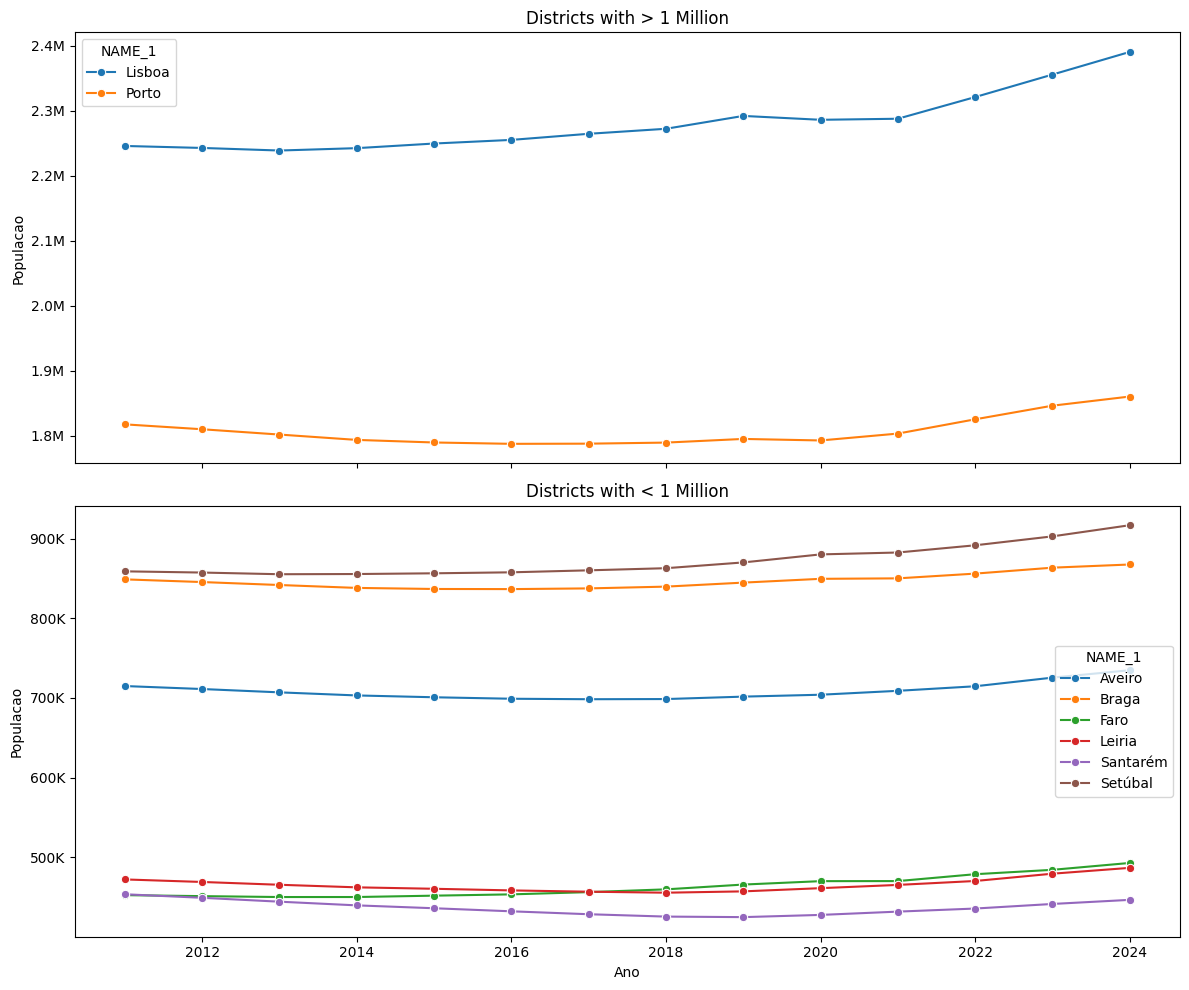

In [25]:
df_big = df_top[df_top["Populacao"] >= 1_000_000]
df_small = df_top[df_top["Populacao"] < 1_000_000]

fig, axes = plt.subplots(2, 1, figsize=(12,10), sharex=True)

sns.lineplot(
    data=df_big,
    x="Ano",
    y="Populacao",
    hue="NAME_1",
    marker="o",
    ax=axes[0]
)

axes[0].set_title("Districts with > 1 Million")
axes[0].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f"{x/1_000_000:.1f}M")
)

sns.lineplot(
    data=df_small,
    x="Ano",
    y="Populacao",
    hue="NAME_1",
    marker="o",
    ax=axes[1]
)

axes[1].set_title("Districts with < 1 Million")
axes[1].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f"{x/1_000:.0f}K")
)

plt.tight_layout()
plt.show()

# Minimum adjustment for clear visibility

3 graphs:

- df_top["Populacao"] > 1,000,000

- df_top["Populacao"] <= 1,000,000 & df_top["Populacao"] >= 700,000

- df_top["Populacao"] < 500,000

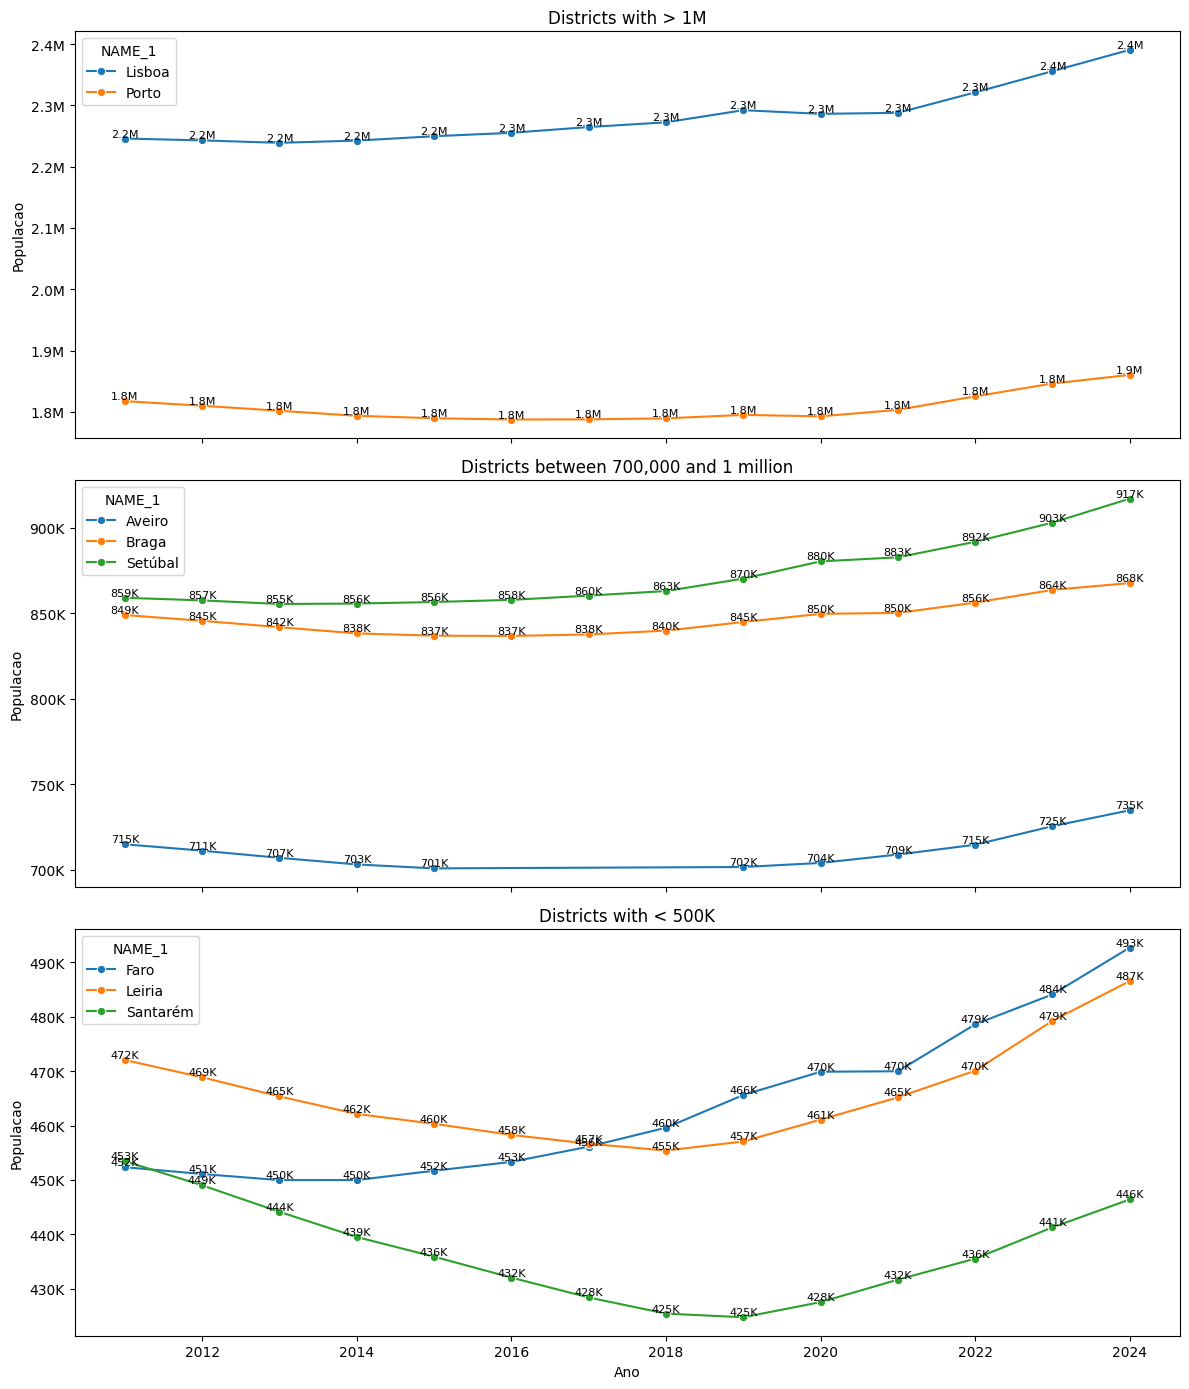

In [26]:
def format_km(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value/1_000:.0f}K"
    else:
        return f"{value:.0f}"

def format_axis_km(x, pos):
    return format_km(x)


df_big = df_top[df_top["Populacao"] > 1_000_000]
df_median = df_top[
    (df_top["Populacao"] <= 1_000_000) &
    (df_top["Populacao"] >= 700_000)
]
df_small = df_top[df_top["Populacao"] < 500_000]

fig, axes = plt.subplots(3, 1, figsize=(12,14), sharex=True)
ax1 = axes[0]
sns.lineplot(
    data=df_big,
    x="Ano",
    y="Populacao",
    hue="NAME_1",
    marker="o",
    ax=ax1
)

ax1.set_title("Districts with > 1M")
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(format_axis_km))

for _, row in df_big.iterrows():
    ax1.text(
        row["Ano"],
        row["Populacao"],
        format_km(row["Populacao"]),
        fontsize=8,
        ha="center",
        va="bottom"
    )


ax2 = axes[1]
sns.lineplot(
    data=df_median,
    x="Ano",
    y="Populacao",
    hue="NAME_1",
    marker="o",
    ax=ax2
)

ax2.set_title("Districts between 700,000 and 1 million")
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(format_axis_km))

for _, row in df_median.iterrows():
    ax2.text(
        row["Ano"],
        row["Populacao"],
        format_km(row["Populacao"]),
        fontsize=8,
        ha="center",
        va="bottom"
    )


ax3 = axes[2]
sns.lineplot(
    data=df_small,
    x="Ano",
    y="Populacao",
    hue="NAME_1",
    marker="o",
    ax=ax3
)

ax3.set_title("Districts with < 500K")
ax3.yaxis.set_major_formatter(mtick.FuncFormatter(format_axis_km))

for _, row in df_small.iterrows():
    ax3.text(
        row["Ano"],
        row["Populacao"],
        format_km(row["Populacao"]),
        fontsize=8,
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()